In [1]:
import json
import os

import ipywidgets as widgets
import nrrd
from IPython.display import display

from src.utils import visualise_patches

In [2]:
# Variables: Set the output dir that the run_inference.py creates and stores the intermediary file and results
output_dir = "/sc-scratch/sc-scratch-cc06-ag-ki-radiologie/prostate_foundation/WSAttention-Prostate/datatemp/processed"
tile_size = 64
depth = 3
json_path = os.path.join(output_dir, "results.json")
with open(json_path) as f:
    data = json.load(f)

In [3]:
files = data.keys()

dropdown = widgets.Dropdown(
    options=files, description="Choose file:", style={"description_width": "initial"}
)
sequences = {"T2W": "t2_registered", "DWI": "DWI_registered", "ADC": "ADC_registered"}

dropdown_seq = widgets.Dropdown(
    options=sequences.keys(), description="Choose sequence:", style={"description_width": "initial"}
)

display(dropdown)
display(dropdown_seq)

Dropdown(description='Choose file:', options=('1009449_11049598.nrrd', '1009449_11049599.nrrd'), style=Descrip…

Dropdown(description='Choose sequence:', options=('T2W', 'DWI', 'ADC'), style=DescriptionStyle(description_wid…

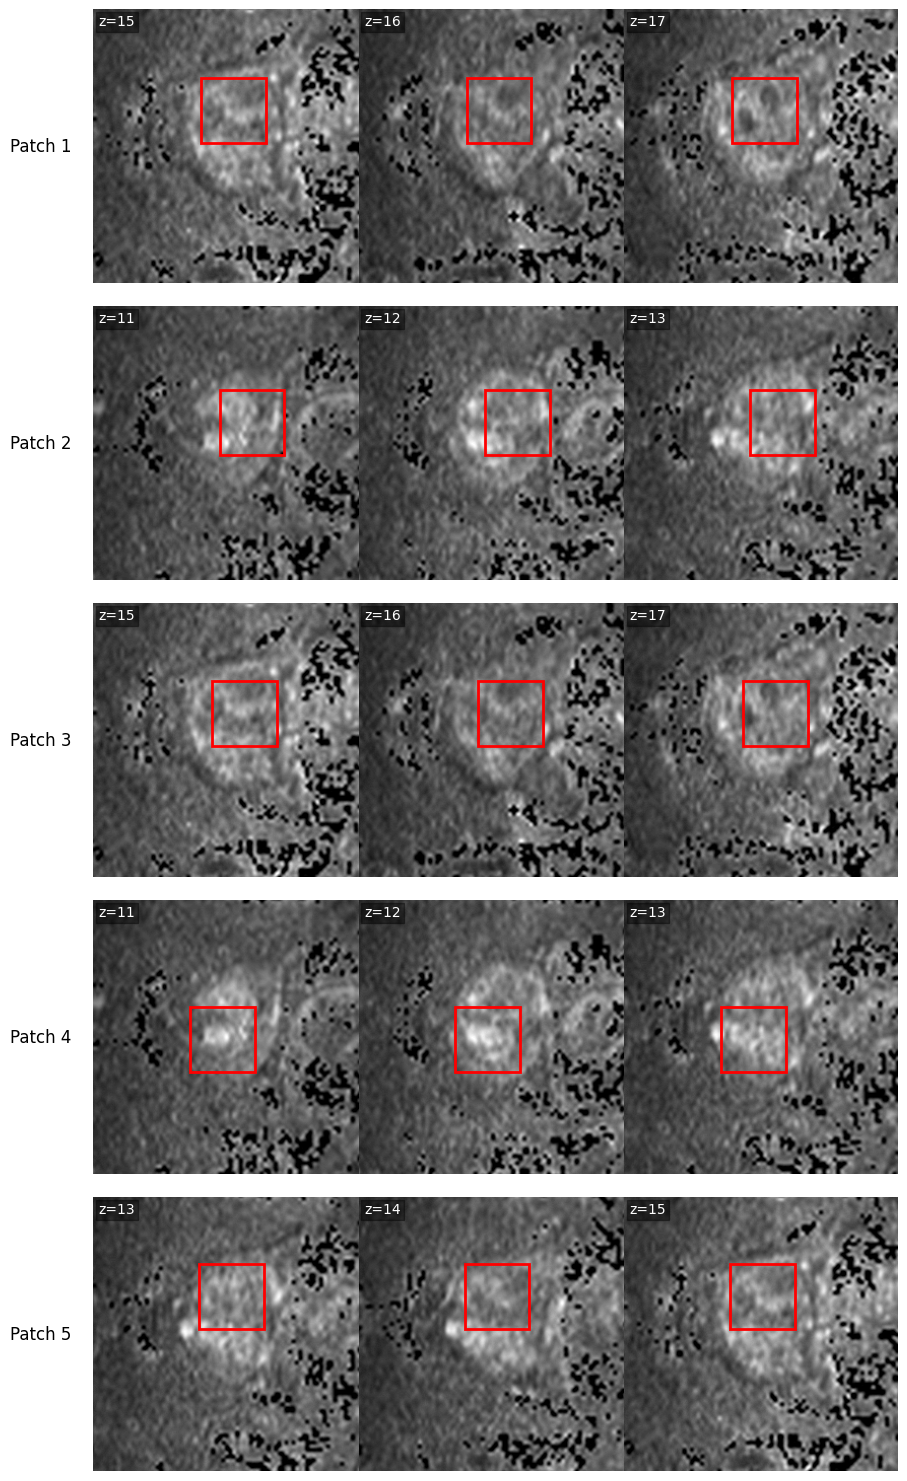

In [ ]:
# Access selection with
key = dropdown.value
seq = sequences[dropdown_seq.value]
coords = data[key]["Top left coordinate of top 5 patches(x,y,z)"]
t2_path = os.path.join(output_dir, seq, key)
t2, _ = nrrd.read(t2_path)
visualise_patches(coords, t2)
# The slice id is displayed on the top left corner of each patch